Importing necessary libraries

In [28]:

import pandas as pd 
import json
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Fix random seed for reproducibility

In [3]:
np.random.seed(7)

In [4]:

with open("train.json") as f:
    d=json.loads(f.read())

In [5]:
df=pd.DataFrame(d)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 5 columns):
band_1        1604 non-null object
band_2        1604 non-null object
id            1604 non-null object
inc_angle     1604 non-null object
is_iceberg    1604 non-null int64
dtypes: int64(1), object(4)
memory usage: 62.7+ KB


Replacing the missing values in incident angle column with the average

In [7]:
df=df.replace("na",40)

In [8]:
df.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878361, -27.15416, -28.668615, -29.537971...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920305, -14.920363, -12.66633...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [13]:
import seaborn as sns
sns.set()

Setting the seaborn style for images

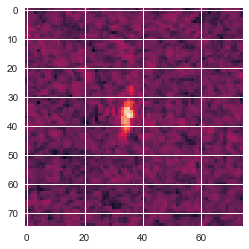

In [14]:
data1=df.iloc[0,0]
dataf=np.reshape(data1,(75,75))
data=dataf[20:50,20:50]



plt.imshow(dataf, interpolation='nearest')
plt.show()

Band 1 image for image id "dfd5f913"(Not an iceberg)

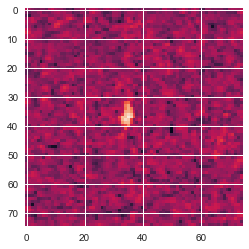

In [15]:
data1=df.iloc[0,1]
dataf=np.reshape(data1,(75,75))
data=dataf[20:50,20:50]



plt.imshow(dataf, interpolation='nearest')
plt.show()

Band 2 image for image id "dfd5f913"(not an iceberg)

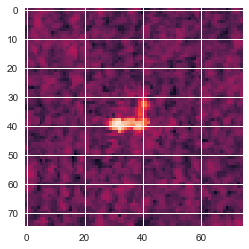

In [16]:
data1=df.iloc[1,0]
dataf=np.reshape(data1,(75,75))
data=dataf[20:50,20:50]



plt.imshow(dataf, interpolation='nearest')
plt.show()

Band 1 image for image id "e25388fd"(Not an iceberg)

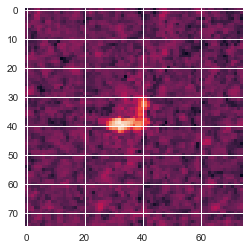

In [17]:
data1=df.iloc[1,1]
dataf=np.reshape(data1,(75,75))
data=dataf[20:50,20:50]



plt.imshow(dataf, interpolation='nearest')
plt.show()

Band 2 image for image id "e25388fd"(Not an iceberg)

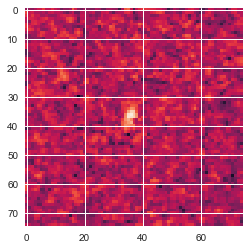

In [19]:
data1=df.iloc[2,0]
dataf=np.reshape(data1,(75,75))
data=dataf[20:50,20:50]



plt.imshow(dataf, interpolation='nearest')
plt.show()

Band 1 image for image id "58b2aaa0"(Is an iceberg)

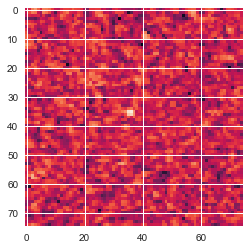

In [20]:
data1=df.iloc[2,1]
dataf=np.reshape(data1,(75,75))
data=dataf[20:50,20:50]



plt.imshow(dataf, interpolation='nearest')
plt.show()

Band 2 image for image id "58b2aaa0"(Is an iceberg)

If we observe the above images we can say that the iceberg or ship is located in the image in the grid of [20:50,20:50]. So, we take only those pixels into our filtered data and leaving the rest

In [21]:
dataa=[]
for i in range(1604):
    data1=df.ix[i,0]
    dataf=np.reshape(data1,(75,75))
    dataf2=dataf[20:50,20:50]
    dataf3=np.reshape(dataf2,(900,))
    dataa.append(dataf3)

dataa=np.array(dataa)

In [22]:
datab=[]
for i in range(1604):
    data1=df.ix[i,1]
    dataf=np.reshape(data1,(75,75))
    dataf2=dataf[20:50,20:50]
    dataf3=np.reshape(dataf2,(900,))
    datab.append(dataf3)

datab=np.array(datab) 

Taking only 900*2 values leaving the rest

In [23]:
df1=pd.DataFrame(dataa)
df2=pd.DataFrame(datab)
df2.columns=np.arange(900,1800)
X1=pd.concat([df1, df2], axis=1)
X1[1800]=df["inc_angle"]

Taking the input features in X and output variable in Y and scaling the X features for best performance of prediction

In [29]:
X=np.array(X1)
X=preprocessing.scale(X)
y=df.ix[:,"is_iceberg"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [33]:
X_train.shape

(1443, 1801)

In [27]:
y_train.head()

714     0
1599    0
451     1
615     0
1189    1
Name: is_iceberg, dtype: int64

Importing the Knn classifier and others

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [37]:
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train) 
y_predict=neigh.predict(X_test)

In [38]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict, labels=[0,1]).ravel()

In [39]:
(tn, fp, fn, tp)

(52, 19, 20, 70)

In [40]:
accuracy=100*(tp+fn)/len(y_predict)
print(accuracy)

55.900621118
